# Iris Dataset

Iris 종에 대한 Data Set입니다. 꽃잎의 넓이, 길이, 꽃받침의 넓이, 길이를 기반으로 꽃의 종류를 구분한 Data Set입니다. Data는 https://www.kaggle.com/uciml/iris 에서 받으실 수 있습니다. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


# Exploratory Data Analysis

In [2]:
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
# drop unnecessary cloumn
iris.drop('Id', axis=1, inplace=True)

In [5]:
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 1D Plot

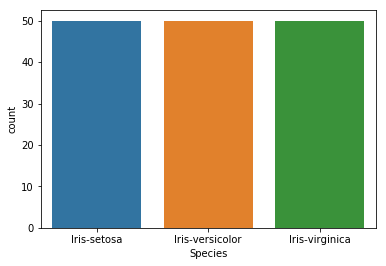

In [7]:
sns.countplot(data=iris, x='Species');

In [8]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

Iris-versicolor, Iris-virginica, Iris-setosa 세 종은 모두 50개로 데이터 수가 동일합니다.

## 2D Plot

### Species Plot (SepalLengthCm vs SepalWidthCm)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


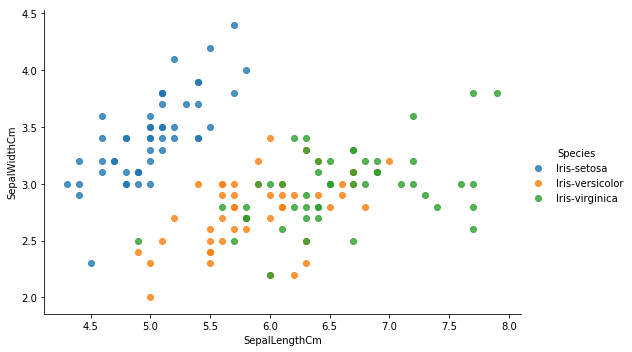

In [9]:
g = sns.FacetGrid(data=iris, hue='Species', size=5, aspect=1.5)
g = g.map(sns.regplot, 'SepalLengthCm', 'SepalWidthCm', fit_reg=False)
g.add_legend();

꽃받침 크기에 따라 Iris-setosa와 나머지 Species는 linear하게 명확히 구분할 수 있습니다. 하지만 Iris-versicolor와 Iris-virginica는 명확히 구분하기 힘듭니다.

### Species Plot (PetalLengthCm vs PetalWidthCm)

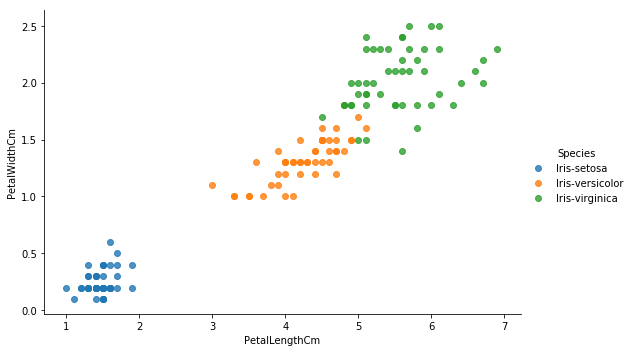

In [10]:
g = sns.FacetGrid(data=iris, hue='Species', size=5, aspect=1.5)
g = g.map(sns.regplot, 'PetalLengthCm', 'PetalWidthCm', fit_reg=False)
g.add_legend();

꽃받침과 마찬가지로 꽃잎 크기에 따라 Iris-setosa는 다른 Species와 명확히 구분할 수 있습니다. 또한 Iris-versicolor와 Iris-virginica도 어느정도 명확히 구분할 수 있습니다.

### Violin Plot of features by Species

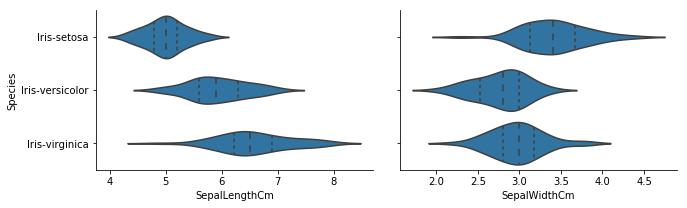

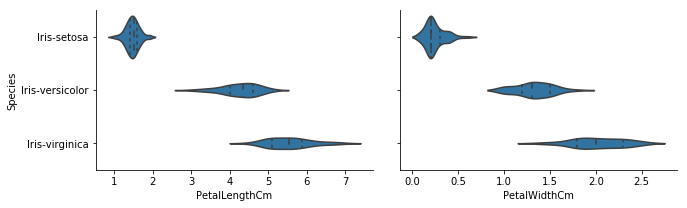

In [11]:
g_sepal = sns.PairGrid(data=iris, x_vars=['SepalLengthCm', 'SepalWidthCm'],
                y_vars=['Species'], height=3, aspect=1.5)
g_sepal.map(sns.violinplot, inner='quartile')

g_petal = sns.PairGrid(data=iris, x_vars=['PetalLengthCm', 'PetalWidthCm'],
                y_vars=['Species'], height=3, aspect=1.5)
g_petal.map(sns.violinplot, inner='quartile');

# Modeling

## Label Encoding

Target value인 Species는 카테고리형 데이터이므로 인코딩을 해주어야 함

In [12]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
iris['EncodedSpecies'] = encoder.fit_transform(iris['Species'])

In [13]:
# print mapping encoded values
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [14]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,EncodedSpecies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = iris.drop(['Species'], axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Naive Bayes Classification

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

y_predict = NB_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


## Support Vecotre Machine

In [17]:
from sklearn.svm import SVC

SVM_model = SVC(gamma=0.1)
SVM_model.fit(X_train, y_train)

y_predict = SVM_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

Logis_model = LogisticRegression(multi_class='auto', solver='lbfgs')
Logis_model.fit(X_train, y_train)

y_predict = Logis_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

y_predict = DT_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train, y_train)

y_predict = RF_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

y_predict = KNN_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


## Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)

y_predict = GB_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


데이터를 명확히 구분하기 쉬워 모든 모델의 성능이 높게 나왔습니다